In [4]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import linregress
import matplotlib as mlp

In [5]:
def getDistance(x1, x2, y1, y2):
    result = math.sqrt((x2 -x1)**2 + (y2 - y1)**2)
    return(result)

In [6]:
average_distance = []
keep_distance = []
average_number_of_persons = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):    
    if "txt" in filename and "geo" not in filename:
        df = get_whole_df(filename, 5, 5)
        selectID = df
        #Alle Abstände berechnen die in Fläche liegen
        borderDistance = []
        all_frames = []
        selectIDBorder = selectID.loc[selectID["inBorder"] == True]
        for gruppe in selectIDBorder["GroupID"].unique():
            selectGroup = selectIDBorder.loc[selectIDBorder["GroupID"] == gruppe, ["id", "frame_x", "x/m", "y/m_x"]]
            for frame in selectGroup["frame_x"].unique():
                selectFrame = selectGroup.loc[selectGroup["frame_x"] == frame]
                #plt.scatter(selectFrame["x/m"], selectFrame["y/m_x"])
                #plotBahnsteig()
                for contact in itertools.combinations(selectFrame["id"], 2):
                    all_frames.append(frame)
                    firstPosition = selectFrame.loc[selectFrame["id"] == contact[0], ["x/m", "y/m_x"]]
                    secondPosition = selectFrame.loc[selectFrame["id"] == contact[1], ["x/m", "y/m_x"]]
                    distanz = getDistance(x1 = float(firstPosition["x/m"]), x2 = float(secondPosition["x/m"]), y1 = float(firstPosition["y/m_x"]), y2 = float(secondPosition["y/m_x"]))
                    borderDistance.append(distanz)
        
        ave_bahnsteiger = get_average_person_number(filename, all_frames)
        average_number_of_persons.append(ave_bahnsteiger)
        print(ave_bahnsteiger)
        ave_distance = statistics.mean(borderDistance)
        average_distance.append(ave_distance)
        #Anzahl an Verletzungen des Mindestabstands
        verletzungen = len([i for i in borderDistance if i < 1.5]) / len(borderDistance)
        eingehalten = len([i for i in borderDistance if i > 1.5]) / len(borderDistance)
        keep_distance.append(eingehalten)    

ZHDB_0205_6_20.txt
46.432613768961495
ZHDB_0212_6_20.txt
45.57058823529412
ZHDB_0219_6_20.txt
45.599382716049384
ZHDB_0226_6_20.txt
55.12562994960403
ZHDB_0304_6_20.txt
45.86071060762101
ZHDB_0311_6_20.txt
44.409698025551684
ZHDB_0318_6_20.txt
21.754222972972972
ZHDB_0325_6_20.txt
16.992094861660078
ZHDB_0401_6_20.txt
19.024193548387096
ZHDB_0408_6_20.txt
20.753012048192772
ZHDB_0415_6_20.txt
19.931972789115648
ZHDB_0422_6_20.txt
21.33288770053476
ZHDB_0429_6_20.txt
20.406189555125724
ZHDB_0506_6_20.txt
21.906072874493926
ZHDB_0513_6_20.txt
27.987854251012145
ZHDB_0520_6_20.txt
30.689162561576353
ZHDB_0527_6_20.txt
30.3602383531961
ZHDB_0603_6_20.txt
31.046935608999224
ZHDB_0610_6_20.txt
32.46953090749671
ZHDB_0617_6_20.txt
34.886813186813185
ZHDB_0624_6_20.txt
39.14108993647609
ZHDB_0701_6_20.txt
35.32058584214809
ZHDB_0708_6_20.txt
40.234026745913816
ZHDB_0715_6_20.txt
33.95847885137757
ZHDB_0722_6_20.txt
32.92405683488486
ZHDB_0729_6_20.txt
31.283777677361048
ZHDB_0805_6_20.txt
33.7

In [7]:
#Korrelation rel. Häufigkeit eingehaltenem Mindestabstand
print(np.corrcoef(keep_distance, average_number_of_persons)[0, 1])
#https://www.medistat.de/glossar/korrelation-assoziation/korrelationskoeffizient-nach-pearson/#:~:text=Interpretation%3A,%2C%20wenn%20r%20%3D%200%20ist.
#pd.Series(keep_distance).corr(pd.Series(average_number_of_persons), method = "pearson", min_periods = 30)

-0.587928313721811


In [8]:
#Korrelation durchschnitlichem Abstand
print(np.corrcoef(average_distance, average_number_of_persons)[0, 1])

-0.47359818306245455


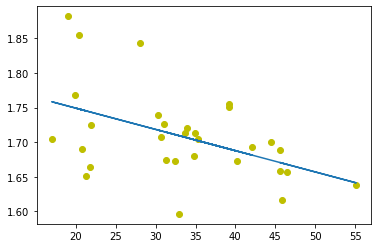

In [9]:
coef = np.polyfit(average_number_of_persons,average_distance,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(average_number_of_persons, average_distance, "yo", average_number_of_persons, poly1d_fn(average_number_of_persons))

In [10]:
average_number_of_persons = np.array(average_number_of_persons)

(1.4, 2.0)

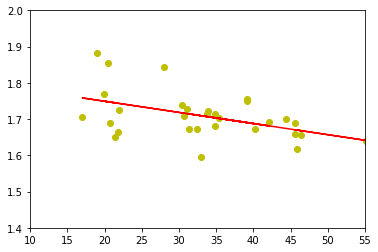

In [11]:
plt.plot(average_number_of_persons, average_distance, "yo")
slope, intercept, r_value, p_value, std_err = linregress(average_number_of_persons,average_distance)
plt.plot(average_number_of_persons, intercept + slope*average_number_of_persons, 'r', label='fitted line')
plt.xlim(10, 55)
plt.ylim(1.4, 2)

In [18]:
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

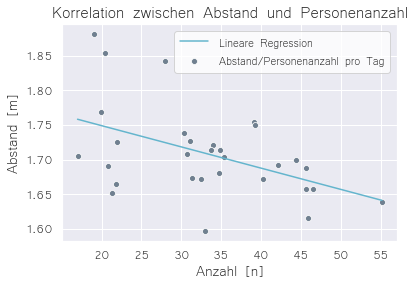

In [25]:
sb.set()
sb.scatterplot(average_number_of_persons, average_distance, color = "slategrey", label = "Abstand/Personenanzahl pro Tag")
sb.lineplot(average_number_of_persons, intercept + slope*average_number_of_persons, color = "c", label = "Lineare Regression")
plt.xlabel("Anzahl [n]", fontsize = 18,fontname="Microsoft Yi Baiti")
plt.xticks(fontsize = 16,fontname="Microsoft Yi Baiti")
plt.ylabel("Abstand [m]", fontsize = 18,fontname="Microsoft Yi Baiti")
plt.yticks(fontsize = 16,fontname="Microsoft Yi Baiti")
plt.title("Korrelation zwischen Abstand und Personenanzahl", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.legend(facecolor = "white", fontsize = 14, prop={'family':"Microsoft Yi Baiti", 'size':14})
plt.savefig(r"Korrelationsplots\Korrelation 5er Traube in Einstiegsfläche", dpi = 200)

In [14]:
from scipy.stats import pearsonr
pearsonr(average_distance, average_number_of_persons)

(-0.4735981830624545, 0.008204068607040534)